# FCMSANet vs. FCNet

Comparison of convergence speed and accuracy for MSA trained and backpropagation trained nets. Different numbers of layers with different numbers of hidden neurons are trained for 100 epochs. The average is computed over 10 runs of the specific setting. 

## The test problem

In [1]:
import torch
from Dataset.Dataset import makeMoonsDataset

dataset_size = 600
batch_size = 40
test_set_size = dataset_size * 0.2

train_loader, test_loader = makeMoonsDataset(dataset_size, batch_size)

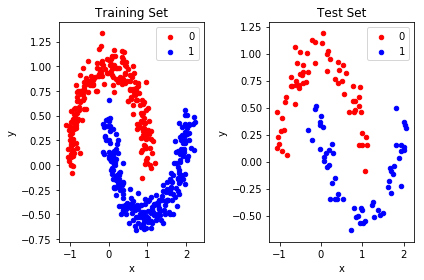

In [3]:
from matplotlib import pyplot as plt
from pandas import DataFrame

x1 = []
x2 = []
y = []
for (data,label) in train_loader:
    res = label#torch.argmax(net.forward, dim=1)
    for point in range(len(data)):
        x1.append(data[point][0].item())
        x2.append(data[point][1].item())
        y.append(res[point].item())
#print(x1)
df = DataFrame(dict(x=x1, y=x2, label=y))
colors = {0:'red', 1:'blue'}
fig, (ax1,ax2) = plt.subplots(1,2)
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax1.set_title('Training Set')
    
x1 = []
x2 = []
y = []
for (data,label) in test_loader:
    res = label#torch.argmax(label, dim=1)
    for point in range(len(data)):
        x1.append(data[point][0].item())
        x2.append(data[point][1].item())
        y.append(res[point].item())
#print(x1)
df = DataFrame(dict(x=x1, y=x2, label=y))
colors = {0:'red', 1:'blue'}
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax2, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax2.set_title('Test Set')
plt.tight_layout()
plt.show()

## Layer sizes [2,4,8,2]

Tested: FCMSANet without bias, FCNet with bias and FCNet without bias

### FC with bias

In [12]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 3
layers = [2,4,8,2]
bias = True

basic_save_key = 'Convergence_results//FCNet//FCNet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCNet(num_layers=num_layers, layers=layers, bias=bias)
    net.set_test_tracking(True)
    net.train(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.017485  #  0.493750  #
Correct predictions: 0.525
#  2  #  0.015013  #  0.772917  #
Correct predictions: 0.8416666666666667
#  3  #  0.012825  #  0.879167  #
Correct predictions: 0.8333333333333334
#  4  #  0.010982  #  0.881250  #
Correct predictions: 0.8166666666666667
#  5  #  0.009596  #  0.872917  #
Correct predictions: 0.8333333333333334
#  6  #  0.008537  #  0.870833  #
Correct predictions: 0.825
#  7  #  0.007780  #  0.877083  #
Correct predictions: 0.8416666666666667
#  8  #  0.007262  #  0.881250  #
Correct predictions: 0.8666666666666667
#  9  #  0.006880  #  0.883333  #
Correct predictions: 0.8666666666666667
#  10  #  0.006662  #  0.885417  #
Correct predictions: 0.8666666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.006422  #  0.897917  #
Correct predictions: 0.8666666666666667
#  12  #  0.006332  #  0.895833  #
Correct predictions: 0.8666666666666667
#  1

#  12  #  0.007558  #  0.885417  #
Correct predictions: 0.8833333333333333
#  13  #  0.007385  #  0.883333  #
Correct predictions: 0.8833333333333333
#  14  #  0.007142  #  0.883333  #
Correct predictions: 0.875
#  15  #  0.006965  #  0.891667  #
Correct predictions: 0.875
#  16  #  0.006897  #  0.891667  #
Correct predictions: 0.875
#  17  #  0.006744  #  0.891667  #
Correct predictions: 0.8833333333333333
#  18  #  0.006683  #  0.891667  #
Correct predictions: 0.8833333333333333
#  19  #  0.006644  #  0.889583  #
Correct predictions: 0.8833333333333333
#  20  #  0.006587  #  0.893750  #
Correct predictions: 0.875
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.006498  #  0.891667  #
Correct predictions: 0.8833333333333333
#  22  #  0.006481  #  0.889583  #
Correct predictions: 0.8833333333333333
#  23  #  0.006431  #  0.900000  #
Correct predictions: 0.8666666666666667
#  24  #  0.006482  #  0.885417  #
Correct predictions: 0.875
#  25  #  0.006400  #  0.891667  #
Co

#  22  #  0.005571  #  0.906250  #
Correct predictions: 0.875
#  23  #  0.005495  #  0.902083  #
Correct predictions: 0.875
#  24  #  0.005416  #  0.908333  #
Correct predictions: 0.8833333333333333
#  25  #  0.005487  #  0.900000  #
Correct predictions: 0.8916666666666667
#  26  #  0.005386  #  0.906250  #
Correct predictions: 0.8916666666666667
#  27  #  0.005571  #  0.897917  #
Correct predictions: 0.8916666666666667
#  28  #  0.005087  #  0.908333  #
Correct predictions: 0.8916666666666667
#  29  #  0.004974  #  0.908333  #
Correct predictions: 0.8833333333333333
#  30  #  0.004735  #  0.918750  #
Correct predictions: 0.8916666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  31  #  0.004680  #  0.918750  #
Correct predictions: 0.8916666666666667
#  32  #  0.004628  #  0.925000  #
Correct predictions: 0.9
#  33  #  0.004473  #  0.922917  #
Correct predictions: 0.9
#  34  #  0.004364  #  0.931250  #
Correct predictions: 0.8916666666666667
#  35  #  0.004216  #  0.931

Correct predictions: 0.8833333333333333
#  39  #  0.005438  #  0.914583  #
Correct predictions: 0.875
#  40  #  0.005444  #  0.906250  #
Correct predictions: 0.875
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.005469  #  0.908333  #
Correct predictions: 0.8916666666666667
#  42  #  0.005487  #  0.902083  #
Correct predictions: 0.8833333333333333
#  43  #  0.005420  #  0.906250  #
Correct predictions: 0.8833333333333333
#  44  #  0.005331  #  0.906250  #
Correct predictions: 0.8833333333333333
#  45  #  0.005410  #  0.906250  #
Correct predictions: 0.8916666666666667
#  46  #  0.005407  #  0.908333  #
Correct predictions: 0.8916666666666667
#  47  #  0.005368  #  0.908333  #
Correct predictions: 0.8833333333333333
#  48  #  0.005333  #  0.904167  #
Correct predictions: 0.8916666666666667
#  49  #  0.005296  #  0.910417  #
Correct predictions: 0.8833333333333333
#  50  #  0.005309  #  0.910417  #
Correct predictions: 0.8833333333333333
#  Epoch  #  Avg-Loss  #  Train-A

Correct predictions: 0.8833333333333333
#  54  #  0.006178  #  0.891667  #
Correct predictions: 0.8833333333333333
#  55  #  0.006102  #  0.895833  #
Correct predictions: 0.8833333333333333
#  56  #  0.006199  #  0.893750  #
Correct predictions: 0.875
#  57  #  0.006062  #  0.889583  #
Correct predictions: 0.875
#  58  #  0.006045  #  0.891667  #
Correct predictions: 0.8833333333333333
#  59  #  0.006090  #  0.895833  #
Correct predictions: 0.8666666666666667
#  60  #  0.006157  #  0.885417  #
Correct predictions: 0.85
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  61  #  0.006001  #  0.883333  #
Correct predictions: 0.8833333333333333
#  62  #  0.006018  #  0.902083  #
Correct predictions: 0.8833333333333333
#  63  #  0.006053  #  0.895833  #
Correct predictions: 0.8583333333333333
#  64  #  0.006058  #  0.893750  #
Correct predictions: 0.8833333333333333
#  65  #  0.005899  #  0.904167  #
Correct predictions: 0.875
#  66  #  0.005946  #  0.904167  #
Correct predictions: 0.88

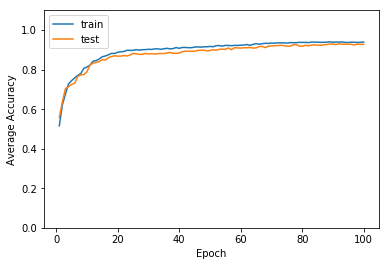

In [13]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### FC without bias

In [14]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 3
layers = [2,4,8,2]
bias = False

basic_save_key = 'Convergence_results//FCNet//FCNet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCNet(num_layers=num_layers, layers=layers, bias=bias)
    net.set_test_tracking(True)
    net.train(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.016320  #  0.525000  #
Correct predictions: 0.5666666666666667
#  2  #  0.015704  #  0.697917  #
Correct predictions: 0.7083333333333334
#  3  #  0.015008  #  0.720833  #
Correct predictions: 0.6916666666666667
#  4  #  0.014357  #  0.718750  #
Correct predictions: 0.7
#  5  #  0.013824  #  0.725000  #
Correct predictions: 0.7166666666666667
#  6  #  0.013361  #  0.737500  #
Correct predictions: 0.725
#  7  #  0.012929  #  0.741667  #
Correct predictions: 0.725
#  8  #  0.012495  #  0.750000  #
Correct predictions: 0.725
#  9  #  0.012006  #  0.762500  #
Correct predictions: 0.7333333333333333
#  10  #  0.011439  #  0.777083  #
Correct predictions: 0.75
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.010784  #  0.783333  #
Correct predictions: 0.7583333333333333
#  12  #  0.010071  #  0.783333  #
Correct predictions: 0.775
#  13  #  0.009377  #  0.791667  #
Correct predictions: 0.7

#  7  #  0.013164  #  0.820833  #
Correct predictions: 0.7916666666666666
#  8  #  0.012748  #  0.820833  #
Correct predictions: 0.8
#  9  #  0.012349  #  0.829167  #
Correct predictions: 0.8
#  10  #  0.011898  #  0.829167  #
Correct predictions: 0.8
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.011345  #  0.829167  #
Correct predictions: 0.8166666666666667
#  12  #  0.010660  #  0.835417  #
Correct predictions: 0.8333333333333334
#  13  #  0.009869  #  0.841667  #
Correct predictions: 0.8333333333333334
#  14  #  0.009011  #  0.850000  #
Correct predictions: 0.8333333333333334
#  15  #  0.008193  #  0.854167  #
Correct predictions: 0.8416666666666667
#  16  #  0.007464  #  0.866667  #
Correct predictions: 0.8416666666666667
#  17  #  0.006912  #  0.872917  #
Correct predictions: 0.8416666666666667
#  18  #  0.006532  #  0.879167  #
Correct predictions: 0.8416666666666667
#  19  #  0.006302  #  0.881250  #
Correct predictions: 0.8416666666666667
#  20  #  0.006142  

Correct predictions: 0.8416666666666667
#  13  #  0.007555  #  0.870833  #
Correct predictions: 0.8416666666666667
#  14  #  0.007415  #  0.879167  #
Correct predictions: 0.8416666666666667
#  15  #  0.007302  #  0.879167  #
Correct predictions: 0.8416666666666667
#  16  #  0.007219  #  0.879167  #
Correct predictions: 0.8416666666666667
#  17  #  0.007153  #  0.875000  #
Correct predictions: 0.8416666666666667
#  18  #  0.007110  #  0.883333  #
Correct predictions: 0.8416666666666667
#  19  #  0.006998  #  0.881250  #
Correct predictions: 0.8416666666666667
#  20  #  0.006980  #  0.879167  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.006929  #  0.881250  #
Correct predictions: 0.8416666666666667
#  22  #  0.006857  #  0.881250  #
Correct predictions: 0.8416666666666667
#  23  #  0.006808  #  0.883333  #
Correct predictions: 0.8416666666666667
#  24  #  0.006757  #  0.881250  #
Correct predictions: 0.8416666666666667
#  25  

Correct predictions: 0.7583333333333333
#  19  #  0.009889  #  0.781250  #
Correct predictions: 0.7666666666666667
#  20  #  0.009292  #  0.793750  #
Correct predictions: 0.7833333333333333
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.008739  #  0.800000  #
Correct predictions: 0.7916666666666666
#  22  #  0.008217  #  0.818750  #
Correct predictions: 0.7916666666666666
#  23  #  0.007744  #  0.829167  #
Correct predictions: 0.8
#  24  #  0.007337  #  0.835417  #
Correct predictions: 0.8166666666666667
#  25  #  0.007015  #  0.835417  #
Correct predictions: 0.825
#  26  #  0.006770  #  0.841667  #
Correct predictions: 0.8333333333333334
#  27  #  0.006548  #  0.856250  #
Correct predictions: 0.8416666666666667
#  28  #  0.006352  #  0.866667  #
Correct predictions: 0.8416666666666667
#  29  #  0.006178  #  0.877083  #
Correct predictions: 0.8416666666666667
#  30  #  0.005996  #  0.879167  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc

Correct predictions: 0.8416666666666667
#  24  #  0.006095  #  0.881250  #
Correct predictions: 0.8416666666666667
#  25  #  0.006055  #  0.885417  #
Correct predictions: 0.8333333333333334
#  26  #  0.006017  #  0.883333  #
Correct predictions: 0.8416666666666667
#  27  #  0.005998  #  0.883333  #
Correct predictions: 0.8333333333333334
#  28  #  0.005974  #  0.885417  #
Correct predictions: 0.8416666666666667
#  29  #  0.005956  #  0.885417  #
Correct predictions: 0.8333333333333334
#  30  #  0.005972  #  0.885417  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  31  #  0.005919  #  0.879167  #
Correct predictions: 0.8333333333333334
#  32  #  0.005922  #  0.883333  #
Correct predictions: 0.8416666666666667
#  33  #  0.005920  #  0.883333  #
Correct predictions: 0.8333333333333334
#  34  #  0.005937  #  0.883333  #
Correct predictions: 0.8333333333333334
#  35  #  0.005895  #  0.885417  #
Correct predictions: 0.8333333333333334
#  36  

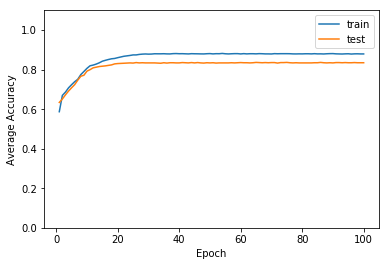

In [15]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### FCMSA without bias

In [16]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 3
layers = [2,4,8,2]
bias = False

basic_save_key = 'Convergence_results//FCMSANet//FCMSANet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCMSANet(num_fc=num_layers,sizes_fc=layers, bias=bias, batchnorm=True, test=False) 
    net.set_test_tracking(True)
    net.train_msa(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.492243  #  0.768750  #
Correct predictions: 0.775
#  2  #  0.445802  #  0.791667  #
Correct predictions: 0.5166666666666667
#  3  #  0.561915  #  0.739583  #
Correct predictions: 0.7916666666666666
#  4  #  0.473286  #  0.785417  #
Correct predictions: 0.7833333333333333
#  5  #  0.474255  #  0.793750  #
Correct predictions: 0.7833333333333333
#  6  #  0.473425  #  0.770833  #
Correct predictions: 0.7583333333333333
#  7  #  0.415151  #  0.802083  #
Correct predictions: 0.7916666666666666
#  8  #  0.389666  #  0.816667  #
Correct predictions: 0.7833333333333333
#  9  #  0.310471  #  0.885417  #
Correct predictions: 0.8083333333333333
#  10  #  0.369139  #  0.875000  #
Correct predictions: 0.8833333333333333
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.383780  #  0.820833  #
Correct predictions: 0.9166666666666666
#  12  #  0.300565  #  0.914583  #
Correct predictions: 0.88333333

#  15  #  0.406314  #  0.816667  #
Correct predictions: 0.8
#  16  #  0.332988  #  0.850000  #
Correct predictions: 0.7666666666666667
#  17  #  0.306619  #  0.864583  #
Correct predictions: 0.85
#  18  #  0.340051  #  0.854167  #
Correct predictions: 0.7916666666666666
#  19  #  0.282050  #  0.893750  #
Correct predictions: 0.8416666666666667
#  20  #  0.292598  #  0.885417  #
Correct predictions: 0.8
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.352551  #  0.845833  #
Correct predictions: 0.8333333333333334
#  22  #  0.310706  #  0.872917  #
Correct predictions: 0.9
#  23  #  0.256213  #  0.927083  #
Correct predictions: 0.6083333333333333
#  24  #  0.408834  #  0.804167  #
Correct predictions: 0.775
#  25  #  0.323399  #  0.870833  #
Correct predictions: 0.7833333333333333
#  26  #  0.374732  #  0.845833  #
Correct predictions: 0.8416666666666667
#  27  #  0.285367  #  0.887500  #
Correct predictions: 0.7833333333333333
#  28  #  0.313353  #  0.910417  #
Correct p

#  29  #  0.429915  #  0.775000  #
Correct predictions: 0.7666666666666667
#  30  #  0.401372  #  0.791667  #
Correct predictions: 0.7916666666666666
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  31  #  0.405596  #  0.777083  #
Correct predictions: 0.7916666666666666
#  32  #  0.387030  #  0.775000  #
Correct predictions: 0.775
#  33  #  0.346559  #  0.845833  #
Correct predictions: 0.6666666666666666
#  34  #  0.409596  #  0.804167  #
Correct predictions: 0.8916666666666667
#  35  #  0.393390  #  0.818750  #
Correct predictions: 0.775
#  36  #  0.378719  #  0.825000  #
Correct predictions: 0.8166666666666667
#  37  #  0.371685  #  0.814583  #
Correct predictions: 0.8083333333333333
#  38  #  0.378672  #  0.833333  #
Correct predictions: 0.875
#  39  #  0.346633  #  0.822917  #
Correct predictions: 0.6166666666666667
#  40  #  0.442653  #  0.777083  #
Correct predictions: 0.7833333333333333
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.321889  #  0.854167  

#  34  #  0.391524  #  0.818750  #
Correct predictions: 0.8166666666666667
#  35  #  0.390669  #  0.825000  #
Correct predictions: 0.7833333333333333
#  36  #  0.406668  #  0.808333  #
Correct predictions: 0.7666666666666667
#  37  #  0.347656  #  0.822917  #
Correct predictions: 0.8416666666666667
#  38  #  0.384698  #  0.810417  #
Correct predictions: 0.7666666666666667
#  39  #  0.397104  #  0.806250  #
Correct predictions: 0.8
#  40  #  0.348995  #  0.822917  #
Correct predictions: 0.8
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.409447  #  0.800000  #
Correct predictions: 0.7916666666666666
#  42  #  0.421227  #  0.802083  #
Correct predictions: 0.7583333333333333
#  43  #  0.454768  #  0.766667  #
Correct predictions: 0.7916666666666666
#  44  #  0.412625  #  0.789583  #
Correct predictions: 0.8083333333333333
#  45  #  0.381959  #  0.820833  #
Correct predictions: 0.7916666666666666
#  46  #  0.374234  #  0.829167  #
Correct predictions: 0.8166666666666667
# 

Correct predictions: 0.8
#  47  #  0.280823  #  0.916667  #
Correct predictions: 0.925
#  48  #  0.283144  #  0.908333  #
Correct predictions: 0.8666666666666667
#  49  #  0.331466  #  0.895833  #
Correct predictions: 0.8416666666666667
#  50  #  0.321350  #  0.881250  #
Correct predictions: 0.8916666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  51  #  0.285324  #  0.939583  #
Correct predictions: 0.95
#  52  #  0.319486  #  0.864583  #
Correct predictions: 0.8583333333333333
#  53  #  0.322276  #  0.860417  #
Correct predictions: 0.8916666666666667
#  54  #  0.329541  #  0.906250  #
Correct predictions: 0.8666666666666667
#  55  #  0.348717  #  0.835417  #
Correct predictions: 0.8583333333333333
#  56  #  0.347065  #  0.866667  #
Correct predictions: 0.8583333333333333
#  57  #  0.340032  #  0.885417  #
Correct predictions: 0.825
#  58  #  0.329234  #  0.866667  #
Correct predictions: 0.8666666666666667
#  59  #  0.304601  #  0.900000  #
Correct predictions: 0.8916

Correct predictions: 0.8833333333333333
#  60  #  0.291625  #  0.908333  #
Correct predictions: 0.9333333333333333
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  61  #  0.280330  #  0.904167  #
Correct predictions: 0.7
#  62  #  0.243441  #  0.933333  #
Correct predictions: 0.9666666666666667
#  63  #  0.272619  #  0.910417  #
Correct predictions: 0.9166666666666666
#  64  #  0.336478  #  0.883333  #
Correct predictions: 0.9666666666666667
#  65  #  0.335195  #  0.870833  #
Correct predictions: 0.7083333333333334
#  66  #  0.328158  #  0.866667  #
Correct predictions: 0.9166666666666666
#  67  #  0.228945  #  0.947917  #
Correct predictions: 0.9666666666666667
#  68  #  0.218469  #  0.958333  #
Correct predictions: 0.9666666666666667
#  69  #  0.245384  #  0.937500  #
Correct predictions: 0.775
#  70  #  0.291931  #  0.891667  #
Correct predictions: 0.9666666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  71  #  0.256651  #  0.935417  #
Correct predictions: 0

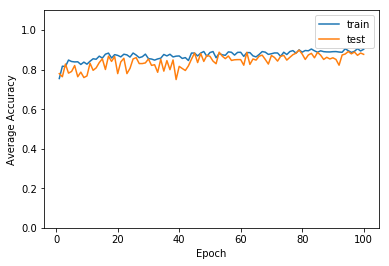

In [17]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

## Layer sizes [2,16,32,2]

Tested: FCMSANet without bias, FCNet with bias and FCNet without bias

### FC with bias

In [18]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 3
layers = [2,16,32,2]
bias = True

basic_save_key = 'Convergence_results//FCNet//FCNet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCNet(num_layers=num_layers, layers=layers, bias=bias)
    net.set_test_tracking(True)
    net.train(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.016925  #  0.506250  #
Correct predictions: 0.5
#  2  #  0.014747  #  0.804167  #
Correct predictions: 0.8083333333333333
#  3  #  0.012063  #  0.841667  #
Correct predictions: 0.8083333333333333
#  4  #  0.009599  #  0.831250  #
Correct predictions: 0.825
#  5  #  0.008111  #  0.847917  #
Correct predictions: 0.825
#  6  #  0.007237  #  0.862500  #
Correct predictions: 0.8416666666666667
#  7  #  0.006556  #  0.877083  #
Correct predictions: 0.8416666666666667
#  8  #  0.006176  #  0.891667  #
Correct predictions: 0.8666666666666667
#  9  #  0.005819  #  0.897917  #
Correct predictions: 0.875
#  10  #  0.005576  #  0.906250  #
Correct predictions: 0.875
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.005445  #  0.910417  #
Correct predictions: 0.8833333333333333
#  12  #  0.005271  #  0.916667  #
Correct predictions: 0.8916666666666667
#  13  #  0.005117  #  0.914583  #
Correct pr

#  26  #  0.003856  #  0.939583  #
Correct predictions: 0.9083333333333333
#  27  #  0.003628  #  0.947917  #
Correct predictions: 0.925
#  28  #  0.003440  #  0.950000  #
Correct predictions: 0.925
#  29  #  0.003315  #  0.952083  #
Correct predictions: 0.9166666666666666
#  30  #  0.003106  #  0.945833  #
Correct predictions: 0.9416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  31  #  0.003079  #  0.956250  #
Correct predictions: 0.95
#  32  #  0.002804  #  0.956250  #
Correct predictions: 0.9416666666666667
#  33  #  0.002666  #  0.956250  #
Correct predictions: 0.9583333333333334
#  34  #  0.002450  #  0.972917  #
Correct predictions: 0.9666666666666667
#  35  #  0.002404  #  0.970833  #
Correct predictions: 0.9666666666666667
#  36  #  0.002240  #  0.975000  #
Correct predictions: 0.9666666666666667
#  37  #  0.002067  #  0.975000  #
Correct predictions: 0.9666666666666667
#  38  #  0.001940  #  0.985417  #
Correct predictions: 0.9666666666666667
#  39  #  0.

Correct predictions: 0.975
#  47  #  0.001031  #  0.993750  #
Correct predictions: 0.9916666666666667
#  48  #  0.000957  #  0.991667  #
Correct predictions: 0.9916666666666667
#  49  #  0.000941  #  0.993750  #
Correct predictions: 0.9916666666666667
#  50  #  0.000873  #  0.993750  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  51  #  0.000857  #  0.993750  #
Correct predictions: 0.9833333333333333
#  52  #  0.000843  #  0.991667  #
Correct predictions: 0.9916666666666667
#  53  #  0.000769  #  0.993750  #
Correct predictions: 0.9916666666666667
#  54  #  0.000742  #  0.991667  #
Correct predictions: 1.0
#  55  #  0.000722  #  0.991667  #
Correct predictions: 0.9916666666666667
#  56  #  0.000707  #  0.995833  #
Correct predictions: 1.0
#  57  #  0.000661  #  0.995833  #
Correct predictions: 0.9916666666666667
#  58  #  0.000656  #  0.993750  #
Correct predictions: 0.9916666666666667
#  59  #  0.000619  #  0.993750  #
Correct predictions: 0.9916666

Correct predictions: 1.0
#  76  #  0.000290  #  1.000000  #
Correct predictions: 1.0
#  77  #  0.000295  #  1.000000  #
Correct predictions: 1.0
#  78  #  0.000287  #  1.000000  #
Correct predictions: 1.0
#  79  #  0.000278  #  1.000000  #
Correct predictions: 1.0
#  80  #  0.000288  #  0.997917  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  81  #  0.000274  #  1.000000  #
Correct predictions: 1.0
#  82  #  0.000258  #  1.000000  #
Correct predictions: 1.0
#  83  #  0.000264  #  1.000000  #
Correct predictions: 1.0
#  84  #  0.000260  #  1.000000  #
Correct predictions: 1.0
#  85  #  0.000248  #  1.000000  #
Correct predictions: 1.0
#  86  #  0.000251  #  1.000000  #
Correct predictions: 1.0
#  87  #  0.000242  #  1.000000  #
Correct predictions: 1.0
#  88  #  0.000242  #  1.000000  #
Correct predictions: 1.0
#  89  #  0.000231  #  1.000000  #
Correct predictions: 1.0
#  90  #  0.000233  #  1.000000  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss 

Time elapsed:  2.771602189999612
##### Run number 10 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.016274  #  0.781250  #
Correct predictions: 0.7666666666666667
#  2  #  0.014393  #  0.777083  #
Correct predictions: 0.775
#  3  #  0.012107  #  0.800000  #
Correct predictions: 0.7666666666666667
#  4  #  0.009894  #  0.816667  #
Correct predictions: 0.8083333333333333
#  5  #  0.008500  #  0.841667  #
Correct predictions: 0.825
#  6  #  0.007552  #  0.854167  #
Correct predictions: 0.8333333333333334
#  7  #  0.006924  #  0.868750  #
Correct predictions: 0.8666666666666667
#  8  #  0.006534  #  0.877083  #
Correct predictions: 0.85
#  9  #  0.006333  #  0.887500  #
Correct predictions: 0.8666666666666667
#  10  #  0.006042  #  0.897917  #
Correct predictions: 0.8583333333333333
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.005992  #  0.895833  #
Correct predictions: 0.875
#  12  #  0.005896  #  0.900000  #
Correct predictions: 0.875
#  13  #  

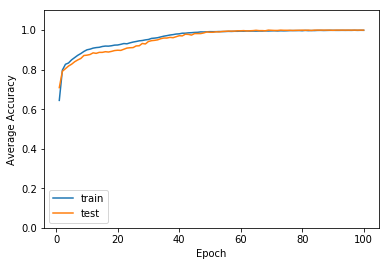

In [19]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### FC without bias

In [20]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 3
layers = [2,16,32,2]
bias = False

basic_save_key = 'Convergence_results//FCNet//FCNet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCNet(num_layers=num_layers, layers=layers, bias=bias)
    net.set_test_tracking(True)
    net.train(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.016288  #  0.504167  #
Correct predictions: 0.5
#  2  #  0.014453  #  0.672917  #
Correct predictions: 0.7416666666666667
#  3  #  0.013190  #  0.810417  #
Correct predictions: 0.8
#  4  #  0.012156  #  0.827083  #
Correct predictions: 0.8166666666666667
#  5  #  0.011098  #  0.837500  #
Correct predictions: 0.8333333333333334
#  6  #  0.009927  #  0.850000  #
Correct predictions: 0.8416666666666667
#  7  #  0.008750  #  0.860417  #
Correct predictions: 0.8416666666666667
#  8  #  0.007763  #  0.872917  #
Correct predictions: 0.8416666666666667
#  9  #  0.007106  #  0.881250  #
Correct predictions: 0.8416666666666667
#  10  #  0.006665  #  0.881250  #
Correct predictions: 0.8333333333333334
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.006412  #  0.885417  #
Correct predictions: 0.8416666666666667
#  12  #  0.006265  #  0.883333  #
Correct predictions: 0.8416666666666667
#  13  #

#  4  #  0.012061  #  0.829167  #
Correct predictions: 0.8
#  5  #  0.010680  #  0.833333  #
Correct predictions: 0.825
#  6  #  0.009299  #  0.850000  #
Correct predictions: 0.8416666666666667
#  7  #  0.008142  #  0.860417  #
Correct predictions: 0.8416666666666667
#  8  #  0.007345  #  0.875000  #
Correct predictions: 0.8416666666666667
#  9  #  0.006847  #  0.875000  #
Correct predictions: 0.8416666666666667
#  10  #  0.006530  #  0.879167  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.006328  #  0.883333  #
Correct predictions: 0.825
#  12  #  0.006197  #  0.881250  #
Correct predictions: 0.8333333333333334
#  13  #  0.006117  #  0.885417  #
Correct predictions: 0.8333333333333334
#  14  #  0.006041  #  0.883333  #
Correct predictions: 0.8333333333333334
#  15  #  0.005950  #  0.885417  #
Correct predictions: 0.8333333333333334
#  16  #  0.005898  #  0.883333  #
Correct predictions: 0.8333333333333334
#  17  #  0.005847 

Correct predictions: 0.8416666666666667
#  8  #  0.006927  #  0.870833  #
Correct predictions: 0.8416666666666667
#  9  #  0.006567  #  0.877083  #
Correct predictions: 0.8416666666666667
#  10  #  0.006340  #  0.879167  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.006178  #  0.881250  #
Correct predictions: 0.8333333333333334
#  12  #  0.006061  #  0.885417  #
Correct predictions: 0.8416666666666667
#  13  #  0.005976  #  0.885417  #
Correct predictions: 0.8416666666666667
#  14  #  0.005913  #  0.883333  #
Correct predictions: 0.8333333333333334
#  15  #  0.005859  #  0.885417  #
Correct predictions: 0.8333333333333334
#  16  #  0.005823  #  0.883333  #
Correct predictions: 0.8333333333333334
#  17  #  0.005779  #  0.881250  #
Correct predictions: 0.8333333333333334
#  18  #  0.005737  #  0.883333  #
Correct predictions: 0.8333333333333334
#  19  #  0.005719  #  0.887500  #
Correct predictions: 0.8333333333333334
#  20  # 

Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.006244  #  0.881250  #
Correct predictions: 0.8416666666666667
#  12  #  0.006147  #  0.883333  #
Correct predictions: 0.825
#  13  #  0.006090  #  0.881250  #
Correct predictions: 0.8333333333333334
#  14  #  0.006047  #  0.883333  #
Correct predictions: 0.8333333333333334
#  15  #  0.005977  #  0.881250  #
Correct predictions: 0.8333333333333334
#  16  #  0.005913  #  0.885417  #
Correct predictions: 0.8333333333333334
#  17  #  0.005899  #  0.883333  #
Correct predictions: 0.8416666666666667
#  18  #  0.005860  #  0.885417  #
Correct predictions: 0.8333333333333334
#  19  #  0.005829  #  0.883333  #
Correct predictions: 0.8333333333333334
#  20  #  0.005803  #  0.885417  #
Correct predictions: 0.8333333333333334
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.005766  #  0.885417  #
Correct predictions: 0.8333333333333334
#  22  #  0.005732  #  0.881250  #
Correct

Correct predictions: 0.8333333333333334
#  14  #  0.006079  #  0.881250  #
Correct predictions: 0.8333333333333334
#  15  #  0.006022  #  0.881250  #
Correct predictions: 0.8416666666666667
#  16  #  0.005935  #  0.885417  #
Correct predictions: 0.8333333333333334
#  17  #  0.005877  #  0.883333  #
Correct predictions: 0.8333333333333334
#  18  #  0.005877  #  0.881250  #
Correct predictions: 0.8333333333333334
#  19  #  0.005845  #  0.881250  #
Correct predictions: 0.8333333333333334
#  20  #  0.005767  #  0.883333  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.005764  #  0.879167  #
Correct predictions: 0.8333333333333334
#  22  #  0.005749  #  0.881250  #
Correct predictions: 0.8333333333333334
#  23  #  0.005693  #  0.883333  #
Correct predictions: 0.8333333333333334
#  24  #  0.005672  #  0.885417  #
Correct predictions: 0.8333333333333334
#  25  #  0.005670  #  0.887500  #
Correct predictions: 0.8333333333333334
#  26  

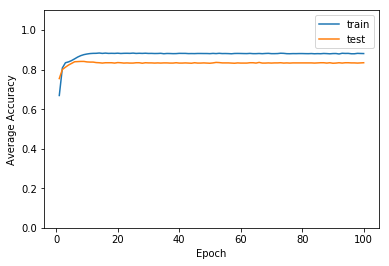

In [21]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### FCMSA without bias

In [22]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 3
layers = [2,16,32,2]
bias = False

basic_save_key = 'Convergence_results//FCMSANet//FCMSANet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCMSANet(num_fc=num_layers,sizes_fc=layers, bias=bias, batchnorm=True, test=False) 
    net.set_test_tracking(True)
    net.train_msa(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.400766  #  0.820833  #
Correct predictions: 0.8833333333333333
#  2  #  0.220816  #  0.956250  #
Correct predictions: 0.95
#  3  #  0.257784  #  0.922917  #
Correct predictions: 0.8833333333333333
#  4  #  0.242543  #  0.945833  #
Correct predictions: 0.95
#  5  #  0.267063  #  0.929167  #
Correct predictions: 0.9
#  6  #  0.231564  #  0.941667  #
Correct predictions: 0.9583333333333334
#  7  #  0.220391  #  0.952083  #
Correct predictions: 0.9666666666666667
#  8  #  0.221055  #  0.952083  #
Correct predictions: 0.9583333333333334
#  9  #  0.210569  #  0.968750  #
Correct predictions: 0.95
#  10  #  0.213860  #  0.962500  #
Correct predictions: 0.975
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.220411  #  0.964583  #
Correct predictions: 0.9583333333333334
#  12  #  0.196894  #  0.979167  #
Correct predictions: 0.8833333333333333
#  13  #  0.198429  #  0.968750  #
Correct predi

#  13  #  0.202988  #  0.962500  #
Correct predictions: 0.9166666666666666
#  14  #  0.185922  #  0.968750  #
Correct predictions: 0.975
#  15  #  0.176793  #  0.981250  #
Correct predictions: 0.9833333333333333
#  16  #  0.211989  #  0.960417  #
Correct predictions: 0.9583333333333334
#  17  #  0.182953  #  0.983333  #
Correct predictions: 0.9833333333333333
#  18  #  0.206193  #  0.972917  #
Correct predictions: 0.9916666666666667
#  19  #  0.185247  #  0.977083  #
Correct predictions: 0.9916666666666667
#  20  #  0.210984  #  0.962500  #
Correct predictions: 0.9916666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.191125  #  0.975000  #
Correct predictions: 0.9583333333333334
#  22  #  0.191581  #  0.975000  #
Correct predictions: 0.9916666666666667
#  23  #  0.207361  #  0.956250  #
Correct predictions: 0.9833333333333333
#  24  #  0.178297  #  0.985417  #
Correct predictions: 0.925
#  25  #  0.201167  #  0.966667  #
Correct predictions: 0.975
#  26  #  0

#  31  #  0.191575  #  0.977083  #
Correct predictions: 0.925
#  32  #  0.181167  #  0.983333  #
Correct predictions: 0.925
#  33  #  0.186638  #  0.970833  #
Correct predictions: 0.975
#  34  #  0.200891  #  0.970833  #
Correct predictions: 0.9916666666666667
#  35  #  0.192009  #  0.989583  #
Correct predictions: 0.9916666666666667
#  36  #  0.184892  #  0.983333  #
Correct predictions: 0.975
#  37  #  0.198723  #  0.970833  #
Correct predictions: 0.9916666666666667
#  38  #  0.183905  #  0.983333  #
Correct predictions: 1.0
#  39  #  0.180114  #  0.983333  #
Correct predictions: 0.975
#  40  #  0.185463  #  0.981250  #
Correct predictions: 0.9916666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.193503  #  0.960417  #
Correct predictions: 0.9833333333333333
#  42  #  0.205009  #  0.962500  #
Correct predictions: 0.9833333333333333
#  43  #  0.192209  #  0.972917  #
Correct predictions: 0.9833333333333333
#  44  #  0.187517  #  0.977083  #
Correct predictio

Correct predictions: 0.9916666666666667
#  49  #  0.174483  #  0.989583  #
Correct predictions: 1.0
#  50  #  0.175868  #  0.987500  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  51  #  0.176506  #  0.985417  #
Correct predictions: 0.9833333333333333
#  52  #  0.189180  #  0.972917  #
Correct predictions: 0.975
#  53  #  0.178636  #  0.979167  #
Correct predictions: 0.9916666666666667
#  54  #  0.178667  #  0.981250  #
Correct predictions: 1.0
#  55  #  0.179693  #  0.979167  #
Correct predictions: 0.9916666666666667
#  56  #  0.177962  #  0.983333  #
Correct predictions: 0.9833333333333333
#  57  #  0.180471  #  0.977083  #
Correct predictions: 0.9666666666666667
#  58  #  0.173484  #  0.985417  #
Correct predictions: 0.9666666666666667
#  59  #  0.189214  #  0.972917  #
Correct predictions: 0.9916666666666667
#  60  #  0.180120  #  0.985417  #
Correct predictions: 0.9833333333333333
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  61  #  0.

Correct predictions: 0.9833333333333333
#  65  #  0.173442  #  0.983333  #
Correct predictions: 0.9916666666666667
#  66  #  0.162233  #  0.995833  #
Correct predictions: 0.9833333333333333
#  67  #  0.171412  #  0.995833  #
Correct predictions: 0.9916666666666667
#  68  #  0.173222  #  0.987500  #
Correct predictions: 0.9833333333333333
#  69  #  0.179727  #  0.987500  #
Correct predictions: 0.975
#  70  #  0.186195  #  0.987500  #
Correct predictions: 0.9916666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  71  #  0.173923  #  0.991667  #
Correct predictions: 1.0
#  72  #  0.190919  #  0.977083  #
Correct predictions: 0.9583333333333334
#  73  #  0.181361  #  0.979167  #
Correct predictions: 0.9916666666666667
#  74  #  0.176253  #  0.985417  #
Correct predictions: 1.0
#  75  #  0.183024  #  0.979167  #
Correct predictions: 1.0
#  76  #  0.175386  #  0.991667  #
Correct predictions: 1.0
#  77  #  0.177757  #  0.989583  #
Correct predictions: 0.9666666666666667
#  78

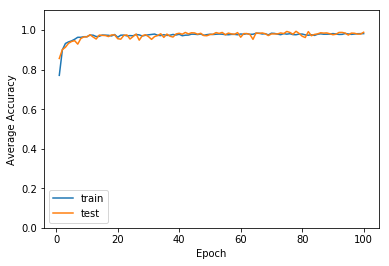

In [23]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

## Layer sizes [2,16,32,64,128,2]

Tested: FCMSANet without bias, FCNet with bias and FCNet without bias

### FC with bias

In [24]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 5
layers = [2,16,32,64,128,2]
bias = True

basic_save_key = 'Convergence_results//FCNet//FCNet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCNet(num_layers=num_layers, layers=layers, bias=bias)
    net.set_test_tracking(True)
    net.train(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.017151  #  0.597917  #
Correct predictions: 0.525
#  2  #  0.016558  #  0.785417  #
Correct predictions: 0.8166666666666667
#  3  #  0.015345  #  0.856250  #
Correct predictions: 0.8333333333333334
#  4  #  0.012928  #  0.870833  #
Correct predictions: 0.825
#  5  #  0.009757  #  0.870833  #
Correct predictions: 0.8416666666666667
#  6  #  0.007571  #  0.879167  #
Correct predictions: 0.825
#  7  #  0.006616  #  0.887500  #
Correct predictions: 0.8666666666666667
#  8  #  0.006100  #  0.893750  #
Correct predictions: 0.8833333333333333
#  9  #  0.005544  #  0.908333  #
Correct predictions: 0.8833333333333333
#  10  #  0.005535  #  0.902083  #
Correct predictions: 0.9
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.004882  #  0.918750  #
Correct predictions: 0.9
#  12  #  0.004495  #  0.931250  #
Correct predictions: 0.9
#  13  #  0.004761  #  0.916667  #
Correct predictions: 0.9
# 

#  34  #  0.000327  #  0.997917  #
Correct predictions: 0.9916666666666667
#  35  #  0.000286  #  0.995833  #
Correct predictions: 1.0
#  36  #  0.000237  #  0.997917  #
Correct predictions: 1.0
#  37  #  0.000284  #  0.997917  #
Correct predictions: 1.0
#  38  #  0.000212  #  1.000000  #
Correct predictions: 1.0
#  39  #  0.000191  #  1.000000  #
Correct predictions: 1.0
#  40  #  0.000236  #  0.997917  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.000201  #  0.997917  #
Correct predictions: 1.0
#  42  #  0.000211  #  0.997917  #
Correct predictions: 1.0
#  43  #  0.000152  #  1.000000  #
Correct predictions: 1.0
#  44  #  0.000212  #  1.000000  #
Correct predictions: 1.0
#  45  #  0.000151  #  1.000000  #
Correct predictions: 1.0
#  46  #  0.000127  #  1.000000  #
Correct predictions: 1.0
#  47  #  0.000120  #  1.000000  #
Correct predictions: 1.0
#  48  #  0.000150  #  1.000000  #
Correct predictions: 1.0
#  49  #  0.000146  #  0.997917 

#  71  #  0.000052  #  1.000000  #
Correct predictions: 1.0
#  72  #  0.000053  #  1.000000  #
Correct predictions: 1.0
#  73  #  0.000054  #  1.000000  #
Correct predictions: 1.0
#  74  #  0.000053  #  1.000000  #
Correct predictions: 1.0
#  75  #  0.000046  #  1.000000  #
Correct predictions: 1.0
#  76  #  0.000047  #  1.000000  #
Correct predictions: 1.0
#  77  #  0.000051  #  1.000000  #
Correct predictions: 1.0
#  78  #  0.000045  #  1.000000  #
Correct predictions: 1.0
#  79  #  0.000046  #  1.000000  #
Correct predictions: 1.0
#  80  #  0.000043  #  1.000000  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  81  #  0.000044  #  1.000000  #
Correct predictions: 1.0
#  82  #  0.000045  #  1.000000  #
Correct predictions: 1.0
#  83  #  0.000039  #  1.000000  #
Correct predictions: 1.0
#  84  #  0.000040  #  1.000000  #
Correct predictions: 1.0
#  85  #  0.000041  #  1.000000  #
Correct predictions: 1.0
#  86  #  0.000041  #  1.000000  #
Correct pred

#  8  #  0.007452  #  0.870833  #
Correct predictions: 0.8666666666666667
#  9  #  0.006496  #  0.893750  #
Correct predictions: 0.8666666666666667
#  10  #  0.006075  #  0.910417  #
Correct predictions: 0.875
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.005862  #  0.906250  #
Correct predictions: 0.8916666666666667
#  12  #  0.005332  #  0.918750  #
Correct predictions: 0.8916666666666667
#  13  #  0.005595  #  0.904167  #
Correct predictions: 0.8916666666666667
#  14  #  0.004854  #  0.931250  #
Correct predictions: 0.9166666666666666
#  15  #  0.004861  #  0.925000  #
Correct predictions: 0.9
#  16  #  0.004679  #  0.931250  #
Correct predictions: 0.9083333333333333
#  17  #  0.006144  #  0.885417  #
Correct predictions: 0.9083333333333333
#  18  #  0.004021  #  0.941667  #
Correct predictions: 0.9416666666666667
#  19  #  0.003676  #  0.943750  #
Correct predictions: 0.9333333333333333
#  20  #  0.002934  #  0.956250  #
Correct predictions: 0.9583333333333334
# 

Correct predictions: 0.9916666666666667
#  39  #  0.000518  #  0.993750  #
Correct predictions: 0.9916666666666667
#  40  #  0.000433  #  0.995833  #
Correct predictions: 0.9916666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.000377  #  0.995833  #
Correct predictions: 0.9916666666666667
#  42  #  0.000338  #  0.995833  #
Correct predictions: 0.9916666666666667
#  43  #  0.000497  #  0.993750  #
Correct predictions: 0.975
#  44  #  0.000337  #  0.997917  #
Correct predictions: 1.0
#  45  #  0.000365  #  0.995833  #
Correct predictions: 1.0
#  46  #  0.000297  #  0.997917  #
Correct predictions: 1.0
#  47  #  0.000313  #  0.993750  #
Correct predictions: 0.9833333333333333
#  48  #  0.017091  #  0.843750  #
Correct predictions: 0.925
#  49  #  0.002038  #  0.970833  #
Correct predictions: 0.9833333333333333
#  50  #  0.000917  #  0.995833  #
Correct predictions: 0.9916666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  51  #  0.000654  #  0.

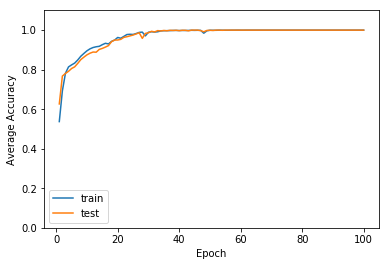

In [25]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### FC without bias 

In [26]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 5
layers = [2,16,32,64,128,2]
bias = False

basic_save_key = 'Convergence_results//FCNet//FCNet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCNet(num_layers=num_layers, layers=layers, bias=bias)
    net.set_test_tracking(True)
    net.train(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.017263  #  0.543750  #
Correct predictions: 0.7083333333333334
#  2  #  0.017163  #  0.775000  #
Correct predictions: 0.7583333333333333
#  3  #  0.017049  #  0.816667  #
Correct predictions: 0.7833333333333333
#  4  #  0.016900  #  0.827083  #
Correct predictions: 0.8166666666666667
#  5  #  0.016681  #  0.837500  #
Correct predictions: 0.8416666666666667
#  6  #  0.016326  #  0.864583  #
Correct predictions: 0.8333333333333334
#  7  #  0.015712  #  0.864583  #
Correct predictions: 0.8416666666666667
#  8  #  0.014600  #  0.875000  #
Correct predictions: 0.8333333333333334
#  9  #  0.012707  #  0.885417  #
Correct predictions: 0.8416666666666667
#  10  #  0.010279  #  0.883333  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.008287  #  0.881250  #
Correct predictions: 0.8416666666666667
#  12  #  0.007232  #  0.875000  #
Correct prediction

Correct predictions: 0.6916666666666667
#  4  #  0.017097  #  0.710417  #
Correct predictions: 0.6916666666666667
#  5  #  0.016972  #  0.718750  #
Correct predictions: 0.6916666666666667
#  6  #  0.016793  #  0.716667  #
Correct predictions: 0.7
#  7  #  0.016512  #  0.716667  #
Correct predictions: 0.7
#  8  #  0.016041  #  0.727083  #
Correct predictions: 0.725
#  9  #  0.015252  #  0.764583  #
Correct predictions: 0.75
#  10  #  0.014044  #  0.795833  #
Correct predictions: 0.7916666666666666
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.012318  #  0.837500  #
Correct predictions: 0.825
#  12  #  0.010026  #  0.858333  #
Correct predictions: 0.8416666666666667
#  13  #  0.007703  #  0.875000  #
Correct predictions: 0.8416666666666667
#  14  #  0.006626  #  0.866667  #
Correct predictions: 0.8416666666666667
#  15  #  0.006018  #  0.877083  #
Correct predictions: 0.8333333333333334
#  16  #  0.005919  #  0.879167  #
Correct predictions: 0.8416666666666667
#  17  #

#  9  #  0.010372  #  0.883333  #
Correct predictions: 0.8416666666666667
#  10  #  0.009068  #  0.875000  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.007908  #  0.872917  #
Correct predictions: 0.8416666666666667
#  12  #  0.007262  #  0.875000  #
Correct predictions: 0.8416666666666667
#  13  #  0.006791  #  0.883333  #
Correct predictions: 0.8416666666666667
#  14  #  0.006547  #  0.881250  #
Correct predictions: 0.825
#  15  #  0.006290  #  0.883333  #
Correct predictions: 0.8333333333333334
#  16  #  0.006311  #  0.881250  #
Correct predictions: 0.8333333333333334
#  17  #  0.006175  #  0.881250  #
Correct predictions: 0.8416666666666667
#  18  #  0.006017  #  0.881250  #
Correct predictions: 0.8333333333333334
#  19  #  0.006129  #  0.881250  #
Correct predictions: 0.8333333333333334
#  20  #  0.006000  #  0.885417  #
Correct predictions: 0.8333333333333334
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #

Correct predictions: 0.8416666666666667
#  14  #  0.006054  #  0.883333  #
Correct predictions: 0.8416666666666667
#  15  #  0.005975  #  0.883333  #
Correct predictions: 0.8333333333333334
#  16  #  0.005879  #  0.881250  #
Correct predictions: 0.8416666666666667
#  17  #  0.005798  #  0.875000  #
Correct predictions: 0.8333333333333334
#  18  #  0.005818  #  0.881250  #
Correct predictions: 0.8416666666666667
#  19  #  0.005759  #  0.885417  #
Correct predictions: 0.8416666666666667
#  20  #  0.005749  #  0.883333  #
Correct predictions: 0.8333333333333334
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.005619  #  0.883333  #
Correct predictions: 0.8416666666666667
#  22  #  0.005696  #  0.883333  #
Correct predictions: 0.8333333333333334
#  23  #  0.005737  #  0.881250  #
Correct predictions: 0.8416666666666667
#  24  #  0.005891  #  0.875000  #
Correct predictions: 0.8416666666666667
#  25  #  0.005599  #  0.879167  #
Correct predictions: 0.8333333333333334
#  26  

Correct predictions: 0.825
#  18  #  0.005659  #  0.885417  #
Correct predictions: 0.8333333333333334
#  19  #  0.005610  #  0.881250  #
Correct predictions: 0.8416666666666667
#  20  #  0.005597  #  0.883333  #
Correct predictions: 0.8416666666666667
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  21  #  0.005387  #  0.885417  #
Correct predictions: 0.8416666666666667
#  22  #  0.005637  #  0.881250  #
Correct predictions: 0.8416666666666667
#  23  #  0.005515  #  0.879167  #
Correct predictions: 0.8416666666666667
#  24  #  0.005463  #  0.881250  #
Correct predictions: 0.8416666666666667
#  25  #  0.005565  #  0.879167  #
Correct predictions: 0.8333333333333334
#  26  #  0.005591  #  0.872917  #
Correct predictions: 0.8333333333333334
#  27  #  0.005511  #  0.881250  #
Correct predictions: 0.8416666666666667
#  28  #  0.005600  #  0.875000  #
Correct predictions: 0.8333333333333334
#  29  #  0.005456  #  0.883333  #
Correct predictions: 0.8333333333333334
#  30  #  0.005589  

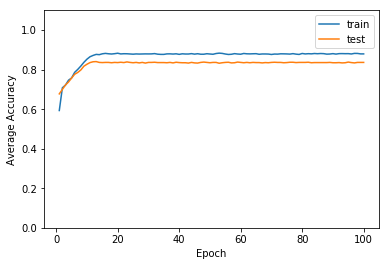

In [27]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### FCMSA without bias

In [28]:
from Networks.ResNet import FCNet, FCMSANet
import numpy as np

num_epochs = 100
num_layers = 5
layers = [2,16,32,64,128,2]
bias = False

basic_save_key = 'Convergence_results//FCMSANet//FCMSANet'

train_results_per_epoch = np.zeros(num_epochs)
test_results_per_epoch = np.zeros(num_epochs)
for i in range(10):
    print('##### Run number {} #####'.format(i+1))
    net = FCMSANet(num_fc=num_layers,sizes_fc=layers, bias=bias, batchnorm=True, test=False) 
    net.set_test_tracking(True)
    net.train_msa(num_epochs, train_loader, test_loader)
    train_results_per_epoch += net.avg_correct_pred.numpy()
    test_results_per_epoch += net.test_results.numpy()

train_results_per_epoch = train_results_per_epoch / 10
test_results_per_epoch = test_results_per_epoch / 10

train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_max_hidden_size_'+str(max(layers))+'_bias_'+str(bias)+'.csv'
np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')

##### Run number 1 #####
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  1  #  0.468546  #  0.785417  #
Correct predictions: 0.8416666666666667
#  2  #  0.242876  #  0.947917  #
Correct predictions: 0.9416666666666667
#  3  #  0.207390  #  0.960417  #
Correct predictions: 0.925
#  4  #  0.218839  #  0.958333  #
Correct predictions: 0.9083333333333333
#  5  #  0.172691  #  0.981250  #
Correct predictions: 0.975
#  6  #  0.184405  #  0.975000  #
Correct predictions: 0.9916666666666667
#  7  #  0.167482  #  0.991667  #
Correct predictions: 0.9916666666666667
#  8  #  0.195921  #  0.970833  #
Correct predictions: 0.975
#  9  #  0.165044  #  0.987500  #
Correct predictions: 0.8666666666666667
#  10  #  0.180442  #  0.983333  #
Correct predictions: 0.975
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.190549  #  0.981250  #
Correct predictions: 0.9666666666666667
#  12  #  0.165045  #  0.983333  #
Correct predictions: 0.9666666666666667
#  13  #  0.167635  #  0.98750

#  30  #  0.166477  #  0.985417  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  31  #  0.175379  #  0.979167  #
Correct predictions: 1.0
#  32  #  0.159024  #  0.991667  #
Correct predictions: 1.0
#  33  #  0.171479  #  0.981250  #
Correct predictions: 0.9916666666666667
#  34  #  0.166482  #  0.975000  #
Correct predictions: 0.9916666666666667
#  35  #  0.151174  #  0.997917  #
Correct predictions: 1.0
#  36  #  0.146832  #  0.995833  #
Correct predictions: 1.0
#  37  #  0.150655  #  0.993750  #
Correct predictions: 0.9916666666666667
#  38  #  0.154746  #  0.991667  #
Correct predictions: 1.0
#  39  #  0.150272  #  0.995833  #
Correct predictions: 1.0
#  40  #  0.152247  #  0.989583  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.147875  #  0.995833  #
Correct predictions: 1.0
#  42  #  0.145365  #  0.993750  #
Correct predictions: 1.0
#  43  #  0.174944  #  0.987500  #
Correct predictions: 1.0
#  44  # 

#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  71  #  0.164341  #  0.985417  #
Correct predictions: 1.0
#  72  #  0.149923  #  0.995833  #
Correct predictions: 1.0
#  73  #  0.141251  #  0.995833  #
Correct predictions: 1.0
#  74  #  0.153810  #  0.987500  #
Correct predictions: 1.0
#  75  #  0.135330  #  1.000000  #
Correct predictions: 1.0
#  76  #  0.159960  #  0.991667  #
Correct predictions: 1.0
#  77  #  0.142583  #  0.995833  #
Correct predictions: 1.0
#  78  #  0.162530  #  0.989583  #
Correct predictions: 1.0
#  79  #  0.150860  #  0.991667  #
Correct predictions: 1.0
#  80  #  0.150711  #  0.993750  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  81  #  0.142261  #  0.993750  #
Correct predictions: 1.0
#  82  #  0.151247  #  0.987500  #
Correct predictions: 1.0
#  83  #  0.158374  #  0.989583  #
Correct predictions: 1.0
#  84  #  0.146699  #  0.995833  #
Correct predictions: 1.0
#  85  #  0.148587  #  0.993750  #
Correct predictions

#  6  #  0.172872  #  0.989583  #
Correct predictions: 1.0
#  7  #  0.162688  #  0.987500  #
Correct predictions: 1.0
#  8  #  0.204764  #  0.956250  #
Correct predictions: 0.9916666666666667
#  9  #  0.179789  #  0.979167  #
Correct predictions: 1.0
#  10  #  0.202561  #  0.962500  #
Correct predictions: 1.0
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  11  #  0.173947  #  0.979167  #
Correct predictions: 0.975
#  12  #  0.191926  #  0.968750  #
Correct predictions: 0.9833333333333333
#  13  #  0.189067  #  0.977083  #
Correct predictions: 0.9916666666666667
#  14  #  0.166866  #  0.991667  #
Correct predictions: 1.0
#  15  #  0.177403  #  0.983333  #
Correct predictions: 1.0
#  16  #  0.166565  #  0.993750  #
Correct predictions: 1.0
#  17  #  0.179368  #  0.985417  #
Correct predictions: 1.0
#  18  #  0.176431  #  0.983333  #
Correct predictions: 1.0
#  19  #  0.163735  #  0.991667  #
Correct predictions: 0.9916666666666667
#  20  #  0.178977  #  0.977083  #
Correct predic

#  37  #  0.164220  #  0.977083  #
Correct predictions: 0.9916666666666667
#  38  #  0.154088  #  0.989583  #
Correct predictions: 1.0
#  39  #  0.157956  #  0.991667  #
Correct predictions: 1.0
#  40  #  0.182848  #  0.968750  #
Correct predictions: 0.9166666666666666
#  Epoch  #  Avg-Loss  #  Train-Acc  ###############
#  41  #  0.162202  #  0.981250  #
Correct predictions: 0.9333333333333333
#  42  #  0.152968  #  0.987500  #
Correct predictions: 0.975
#  43  #  0.174181  #  0.979167  #
Correct predictions: 0.9916666666666667
#  44  #  0.169655  #  0.985417  #
Correct predictions: 0.9833333333333333
#  45  #  0.160252  #  0.989583  #
Correct predictions: 1.0
#  46  #  0.158434  #  0.987500  #
Correct predictions: 0.9916666666666667
#  47  #  0.169426  #  0.977083  #
Correct predictions: 1.0
#  48  #  0.171600  #  0.985417  #
Correct predictions: 0.975
#  49  #  0.174030  #  0.975000  #
Correct predictions: 0.9416666666666667
#  50  #  0.164054  #  0.983333  #
Correct predictions: 1.

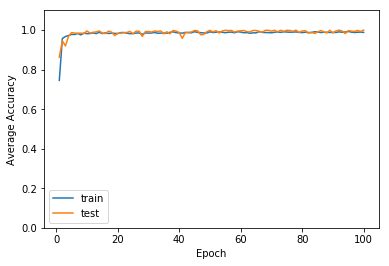

In [29]:
fig, ax = plt.subplots()
epochs = np.arange(1,101,1)
ax.plot(epochs, train_results_per_epoch, label='train')
ax.plot(epochs, test_results_per_epoch/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')